# Artificial Neural Networks

## Initial Daft and Theory

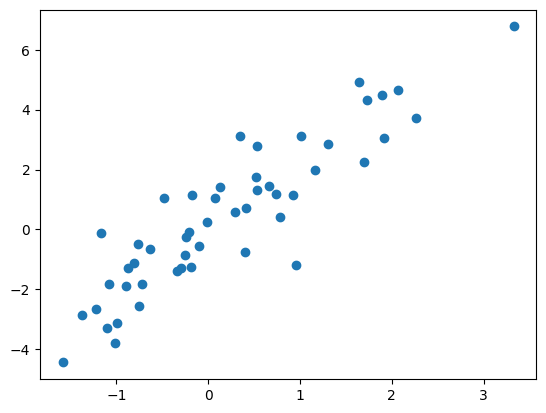

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from IPython import display
import matplotlib.pyplot as plt

N = 50
x = torch.randn(N, 1)
y = 2*x + torch.randn(N,1)

plt.plot(x, y, 'o')
plt.show()

In [ ]:
ann = nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1)
)

ann

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
lr = 0.05
loss = nn.MSELoss()
optimizer = torch.optim.SGD(ann.parameters(), lr = lr)

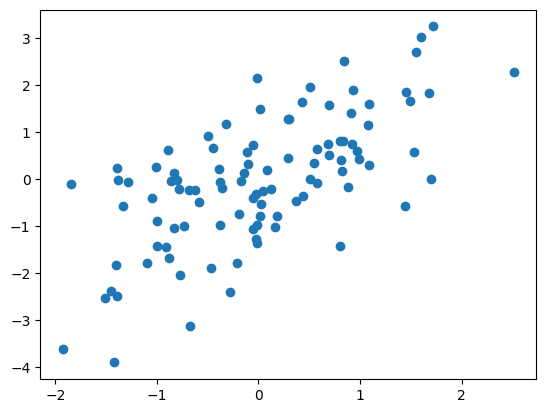

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
x = np.random.randn(N, 1)
y = 1.1*x + np.random.randn(N,1)

plt.plot(x, y, 'o')
plt.show()

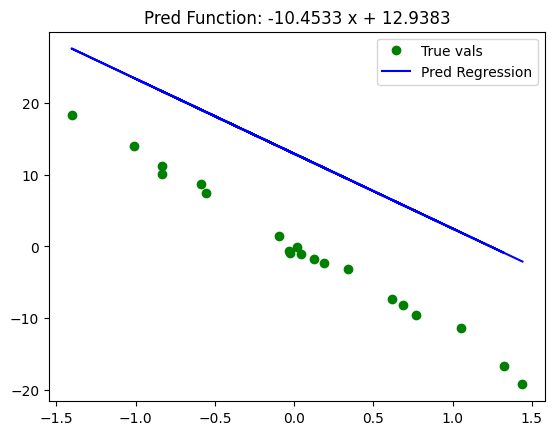

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 20
x = np.random.randn(N,1)

w_true = np.random.randn()*10
b_true = np.random.randn(N,1)
y_true = w_true * x + b_true

w_pred = np.random.randn()*10
b_pred = np.random.randn()*10
y_pred = w_pred * x + b_pred

plt.plot(x, y_true, 'go')
plt.plot(x, y_pred, 'b-')
plt.legend(['True vals', 'Pred Regression'])
plt.title(f'Pred Function: {w_pred:.4f} x + {b_pred:.4f}')
plt.show()

In [ ]:
loss = np.mean((y_pred - y_true) ** 2)
loss

np.float64(168.82033089629033)

$$ L = \frac{1}{N} \sum^N_{i=1}(y_{pred}^i - y_{true}^i)^2 $$

Now we count derivative $L$ of $y_{pred}$ to see how to change $y_{pred}$ so $L$ is the smallest

In [ ]:
import sympy as sym

y_pred_, N_, y_true_ = sym.symbols('y_pred, N, y_true')

L_ = 1/N_ * (y_true_ - y_pred_)**2
L_

(-y_pred + y_true)**2/N

In [ ]:
sym.diff(L_, y_pred_)

(2*y_pred - 2*y_true)/N

$$ \frac{\partial L}{\partial y_{pred}} = \frac{2}{N}\times (y_{pred}-y_{true}) $$

In [ ]:
dl_dypred = 2/N * (y_pred-y_true)
dl_dypred

array([[1.03959484],
       [1.33132554],
       [1.44628614],
       [1.3858913 ],
       [1.38537286],
       [1.42037419],
       [0.93347588],
       [1.27685891],
       [1.25514108],
       [1.13275909],
       [1.03544355],
       [1.33605621],
       [1.24532245],
       [1.15874048],
       [1.33298521],
       [1.3463707 ],
       [0.95498734],
       [1.57289176],
       [1.39000714],
       [1.71554188]])

teraz obliczamy:

$$ \frac{\partial y_{pred}}{\partial w} = x $$
$$ \frac{\partial y_{pred}}{\partial b} = 1 $$

bo najpierw $L$ po $y_{pred}$ ale $y_{pred}$ zależy od $w$ i $b$ więc trzeba powyższe pochodne zrobić

In [ ]:
dypred_dw = x
dypred_db = 1

Teraz, ostatenie nam chodzi o znalezienie jak $L$ sie zmienia w zależności od wszsytkich parameterów, w funkcji liniowej to $w$ i $b$, czyli jeżeli $L$ zależy od $y_{pred}$ i $y_{pred}$ zależy od $w$ to $L$ zależy od $w$.

$$ \frac{\partial L}{\partial w} =  \frac{\partial L}{\partial y_{pred}} \times \frac{\partial y_{pred}}{\partial w} = \frac{2}{N}(y_{pred} - y_{true}) \times x $$

$$ \frac{\partial L}{\partial b} =  \frac{\partial L}{\partial y_{pred}} \times \frac{\partial y_{pred}}{\partial b} = \frac{2}{N}(y_{pred} - y_{true}) \times 1 $$

In [ ]:
dl_dw = 2/N * (y_pred - y_true) * x
dl_db = 2/N * (y_pred - y_true)

Dobra wszystko pieknie ale to sa naze pochodne wiec ubierzmy je w funkcje najpierw.

Text(0.5, 1.0, 'Initial Prediction of y: 4.0420x + 6.1551')

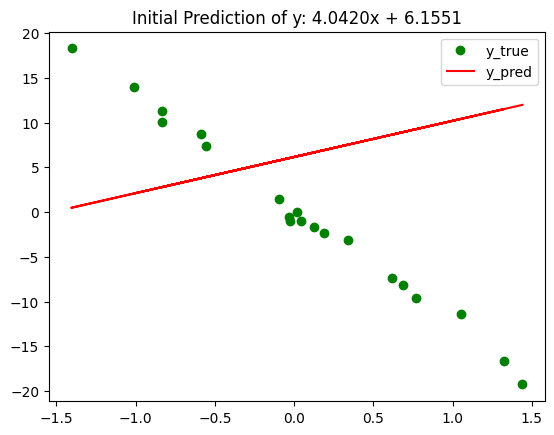

In [ ]:
def dl_dw(x, y_pred):
  return 2/N * np.mean((y_pred - y_true) * x)

def dl_db(y_pred):
  return 2/N * np.mean((y_pred - y_true))

w_pred = np.random.rand()*10
b_pred = np.random.rand()*10
y_pred = w_pred * x + b_pred

plt.plot(x, y_true, 'go')
plt.plot(x, y_pred, 'r-')
plt.legend(['y_true', 'y_pred'])
plt.title(f'Initial Prediction of y: {w_pred:.4f}x + {b_pred:.4f}')

In [ ]:
lr = 0.01
epochs = 10000

for i in range(epochs):
  # feed forward
  y_pred = w_pred * x + b_pred

  # backprop
  grad_w = dl_dw(x, y_pred)
  w_pred = w_pred - lr * grad_w

  grad_b = dl_db(y_pred)
  b_pred = b_pred - lr * grad_b

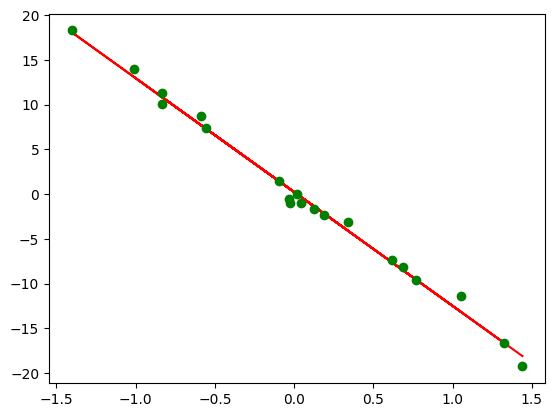

In [ ]:
plt.plot(x, y_pred, 'r-')
plt.plot(x, y_true, 'go')
plt.show()

## Clean ANN for Linear Regression with Sympy and Numpy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [ ]:
# indexes and count of samples
i, N = sym.symbols('i N', integer = True)

# model parameters
x = sym.Function('x')(i)
w, b = sym.symbols('w b')

# y_pred and y_true
y_true = sym.Function('y_true')(i)
y_pred = w * x + b

i, N, w, b, y_true, y_pred

(i, N, w, b, y_true(i), b + w*x(i))

Let's create Loss function MSE

In [ ]:
# Loss Function

L = (1/N) * sym.summation((y_pred - y_true)**2,(i, 1, N))
L

Sum((b + w*x(i) - y_true(i))**2, (i, 1, N))/N

Now let's see what's the derivative of Loss function (MSE)

In [ ]:
sym.diff(L, w)

Sum(2*(b + w*x(i) - y_true(i))*x(i), (i, 1, N))/N

In [ ]:
sym.diff(L, b)

Sum(2*b + 2*w*x(i) - 2*y_true(i), (i, 1, N))/N

Let's create df functions for Loss wrt bias and weight

In [ ]:
def dL_dw(w_pred, b_pred):
  return np.mean(2*(b_pred+w_pred*x-y_true)*x)

def dL_db(w_pred, b_pred):
  return np.mean(2*(b_pred+w_pred*x-y_true))

def loss_fn(w_pred, b_pred):
  y_pred = w_pred * x + b_pred
  return np.mean((y_pred - y_true)**2)

Let's create data

Text(0.5, 1.0, 'True Data')

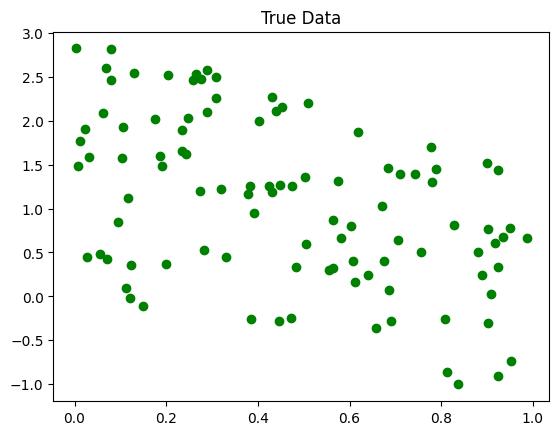

In [ ]:
N = 100
x = np.random.rand(N, 1)
w_true = np.random.rand()*-10
b_true = np.random.rand(N,1)*3
y_true = w_true*x + b_true
plt.plot(x, y_true, 'go')
plt.title(f'True Data')

Now let's create training loop for Linear Regression

In [ ]:
lr = 0.01
epochs = 2000

# initial random params
w_pred = np.random.randn()
b_pred = np.random.randn()

for epoch in range(epochs):
  loss = loss_fn(w_pred, b_pred)

  if epoch%100==0:
    print('Epoch:', epoch,'Loss:',loss)
  # forward pass
  y_pred = w_pred * x + b_pred

  # backprop
  grad_w = dL_dw(w_pred, b_pred) # loss.backward() in torch
  w_pred = w_pred - lr * grad_w # optimizer.step() in torch

  grad_b = dL_db(w_pred, b_pred)
  b_pred = b_pred - lr * grad_b

  # in torch we need to optimizer.zero_grad() torch in default sum up all grads

Epoch: 0 Loss: 1.720015357022862
Epoch: 100 Loss: 0.8607507852178798
Epoch: 200 Loss: 0.8087469161387526
Epoch: 300 Loss: 0.7736512590135102
Epoch: 400 Loss: 0.7472191134868832
Epoch: 500 Loss: 0.7272946065248633
Epoch: 600 Loss: 0.7122757418288846
Epoch: 700 Loss: 0.7009547184159751
Epoch: 800 Loss: 0.6924210811606316
Epoch: 900 Loss: 0.6859885387466556
Epoch: 1000 Loss: 0.6811397737259111
Epoch: 1100 Loss: 0.6774848390657537
Epoch: 1200 Loss: 0.6747297978722507
Epoch: 1300 Loss: 0.6726530844194427
Epoch: 1400 Loss: 0.6710876854064465
Epoch: 1500 Loss: 0.6699077084257147
Epoch: 1600 Loss: 0.6690182574528336
Epoch: 1700 Loss: 0.668347801125229
Epoch: 1800 Loss: 0.6678424200520383
Epoch: 1900 Loss: 0.6674614705127123


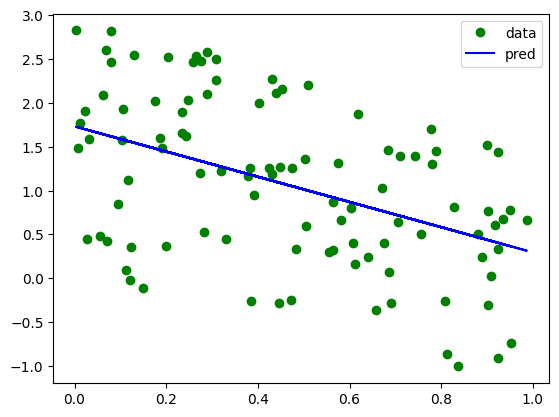

In [ ]:
plt.plot(x, y_true, 'go')
plt.plot(x, y_pred, 'b-')
plt.legend(['data','pred'])
plt.show()

## Torch Implementation

In [ ]:
import numpy as np

class Tensor:
  def __init__(self, data, requires_grad=False):
    self.data = np.array(data, dtype=np.float32)
    self.requires_grad = requires_grad
    self.grad = np.zeros_like(self.data) if requires_grad else None
    self._backward = lambda: None # funkcja obliczajaca gradient dla tej operacji
    self._prev = set() # poprzednie tensory w grafie

  # funkcja do dodawania bo jak jest np. ax + b to b tez musi byc tensorem
  def __add__(self, other):
    other = other if isinstance(other, Tensor) else Tensor(other)
    out = Tensor(
            self.data + other.data,
            requires_grad=self.requires_grad or other.requires_grad
            )

    # definiujemy funkcje ._backward() tylko jesli trzeba gradient
    def _backward():
      if self.requires_grad:
        self.grad = self.grad + out.grad
      if other.requires_grad:
        other.grad = other.grad + out.grad

    # przypisujemy funkcje i poprzednikow
    out._backward = _backward
    out._prev = {self, other}
    return out

  def __mul__(self, other):
    other = other if isinstance(other, Tensor) else Tensor(other)
    out = Tensor(
        self.data * other.data,
        requires_grad = self.requires_grad or other.requires_grad
    )
    def _backward():
      if self.requires_grad:
        self.grad = self.grad + (other.data * out.grad)
      if other.requires_grad:
        other.grad = other.grad + (self.data * out.grad)

    out._backward = _backward
    out._prev = {self, other}
    return out

  def __matmul__(self, other):
    other = other if isinstance(other, Tensor) else Tensor(other)
    out = Tensor(
        self.data @ other.data,
        requires_grad=self.requires_grad or other.requires_grad
    )

    def _backward():
        grad = out.grad
        if grad.ndim == 1:
            grad = grad.reshape(1, -1)

        if self.requires_grad:
            if self.grad is None:
                self.grad = np.zeros_like(self.data)
            grad_self = grad @ other.data.T
            if grad_self.shape != self.grad.shape:
                grad_self = grad_self.reshape(self.grad.shape)
            self.grad += grad_self

        if other.requires_grad:
            if other.grad is None:
                other.grad = np.zeros_like(other.data)
            self_data = self.data
            if self_data.ndim == 1:
                self_data = self_data.reshape(1, -1)
            grad_other = self_data.T @ grad
            if grad_other.shape != other.grad.shape:
                grad_other = grad_other.reshape(other.grad.shape)
            other.grad += grad_other

    out._backward = _backward
    out._prev = {self, other}
    return out


  def __sub__(self, other):
    other = other if isinstance(other, Tensor) else Tensor(other)
    out = Tensor(self.data - other.data, requires_grad=self.requires_grad or other.requires_grad)

    def _backward():
        if self.requires_grad:
            self.grad += out.grad
        if other.requires_grad:
            other.grad -= out.grad

    out._backward = _backward
    out._prev = {self, other}
    return out

  def mean(self):
    out = Tensor(self.data.mean(), requires_grad=self.requires_grad)

    def _backward():
        if self.requires_grad:
            self.grad += out.grad * np.ones_like(self.data) / self.data.size

    out._backward = _backward
    out._prev = {self}
    return out

  def backward(self, grad=None):
    if not self.requires_grad:
      return

    if grad is None:
      if self.data.size != 1:
        raise RuntimeError("grad must be specified for non-scalar outputs")
      grad = np.ones_like(self.data)

    self.grad = grad

    # Topological sort for taking derivatives in proper order
    visited = set()
    def topo_sort(tensor):
      if tensor not in visited:
        visited.add(tensor)
        for prev in tensor._prev:
          topo_sort(prev)
        order.append(tensor)

    order = []
    topo_sort(self)

    for t in reversed(order):
      t._backward()

Linear shapes:

$$ x (\text{batch_size}, \text{in_features}) \times weights(\text{in_features},\text{out_features}) + bias(\text{out_features}) = [x\times weights] (\text{batch_size}, \text{out_features}) +bias(\text{out_features}) = out(\text{batch_size},\text{out_features})$$

In [ ]:
class Linear:
    def __init__(self, in_features, out_features):
        self.weights = Tensor(
            np.random.randn(in_features, out_features) * np.sqrt(2. / in_features),
            requires_grad=True
        )
        self.bias = Tensor(np.zeros(out_features), requires_grad=True)

    def __call__(self, x):
        return x @ self.weights + self.bias


In [ ]:
def relu(x):
    out = Tensor(np.maximum(0, x.data), requires_grad=x.requires_grad)

    def _backward():
        if x.requires_grad:
            x.grad += (x.data > 0).astype(np.float32) * out.grad

    out._backward = _backward
    out._prev = {x}
    return out

In [ ]:
def mse_loss(pred, target):
    diff = pred - target
    return (diff * diff).mean()

### One Iter Test

In [ ]:
x = Tensor([1.0,4.0,3.0], requires_grad = True)
y_true = Tensor([0.0, 1.0])

layer1 = Linear(3,4)
layer2 = Linear(4,2)

# forward pass
z1 = layer1(x)
a1 = relu(z1)
z2 = layer2(a1)
loss = mse_loss(z2, y_true)

# backward
loss.backward()

print('Loss:', loss)
print("Gradient w.r.t x:", x.grad)
print("Gradient w.r.t layer2 weights:", layer2.weights.grad)

Loss: <__main__.Tensor object at 0x7eaa5ae0e190>
Gradient w.r.t x: [0. 0. 0.]
Gradient w.r.t layer2 weights: [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [ ]:
class Sequential:
  def __init__(self, *layers):
      self.layers = layers

  def __call__(self, x):
      for layer in self.layers:
          x = layer(x)
      return x

In [ ]:
class SGD:
    def __init__(self, parameters, lr=0.01):
        self.parameters = parameters  # lista Tensorów (wagi, biasy)
        self.lr = lr

    def step(self):
        for p in self.parameters:
            if p.grad is not None:
                p.data -= self.lr * p.grad.reshape(p.data.shape)

    def zero_grad(self):
        for p in self.parameters:
            if p.grad is not None:
                p.grad = np.zeros_like(p.grad)

In [ ]:
def get_parameters(model):
    params = []
    for layer in model.layers:
        if isinstance(layer, Linear):
            params.append(layer.weights)
            params.append(layer.bias)
    return params

### Full Training for Linear Regression

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

$ x = (\text{batch_size}, \text{in_features}) = (1000, 1)$

Text(0.5, 1.0, 'True Distribution')

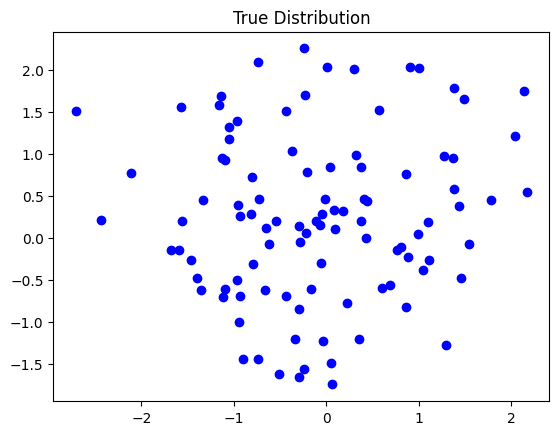

In [ ]:
N = 100
x = Tensor(np.random.randn(1,N), requires_grad = True)
w_true = Tensor(np.random.randn()*2, requires_grad = True)
b_true = Tensor(np.random.randn(1, N), requires_grad = True)
y_true = w_true.data * x.data + b_true.data
plt.plot(x.data, y_true, 'bo')
plt.title('True Distribution')

In [ ]:
lr = 0.01
epochs = 100

ann = Sequential(
    Linear(N, 64),
    relu,
    Linear(64, 100)
)

optimizer = SGD(get_parameters(ann), lr=0.01)

for epoch in range(epochs):
    out = ann(x)
    loss = mse_loss(out, y_true)  # 💥 poprawka tutaj

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.data}")


Epoch 0, Loss: 2.0215485095977783
Epoch 50, Loss: 0.5532612204551697


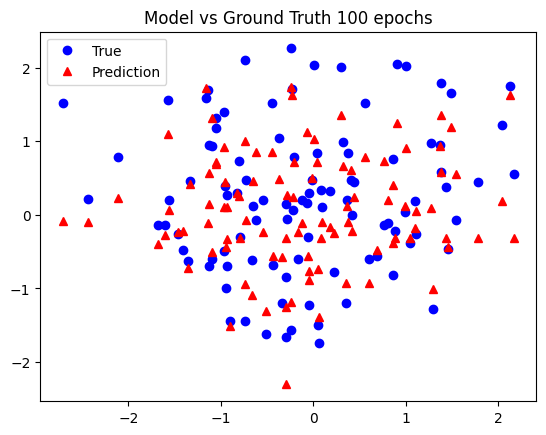

In [ ]:
y_pred = ann(x).data

plt.plot(np.array(x.data).flatten(), np.array(y_true.data).flatten(), 'bo', label='True')
plt.plot(np.array(x.data).flatten(), np.array(y_pred).flatten(), 'r^', label='Prediction')
plt.legend()
plt.title("Model vs Ground Truth 100 epochs")
plt.show()

In [ ]:
for epoch in range(epochs):
    out = ann(x)
    loss = mse_loss(out, y_true)  # 💥 poprawka tutaj

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.data}")

Epoch 0, Loss: 0.30700215697288513
Epoch 50, Loss: 0.1363988071680069


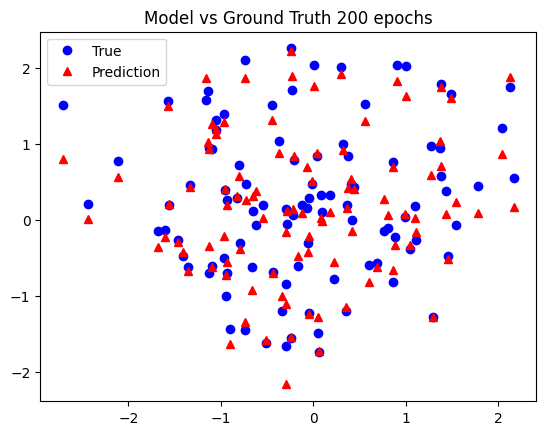

In [ ]:
y_pred = ann(x).data

plt.plot(np.array(x.data).flatten(), np.array(y_true.data).flatten(), 'bo', label='True')
plt.plot(np.array(x.data).flatten(), np.array(y_pred).flatten(), 'r^', label='Prediction')
plt.legend()
plt.title("Model vs Ground Truth 200 epochs")
plt.show()

In [ ]:
for epoch in range(epochs+500):
    out = ann(x)
    loss = mse_loss(out, y_true)  # 💥 poprawka tutaj

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.data}")

Epoch 0, Loss: 0.05306529998779297
Epoch 50, Loss: 0.019519373774528503
Epoch 100, Loss: 0.007033111993223429
Epoch 150, Loss: 0.0025155884213745594
Epoch 200, Loss: 0.0008974390220828354
Epoch 250, Loss: 0.00031986969406716526
Epoch 300, Loss: 0.00011397182970540598
Epoch 350, Loss: 4.0604885725770146e-05
Epoch 400, Loss: 1.4465893400483765e-05
Epoch 450, Loss: 5.153407073521521e-06
Epoch 500, Loss: 1.8358430224907352e-06
Epoch 550, Loss: 6.540066692650726e-07


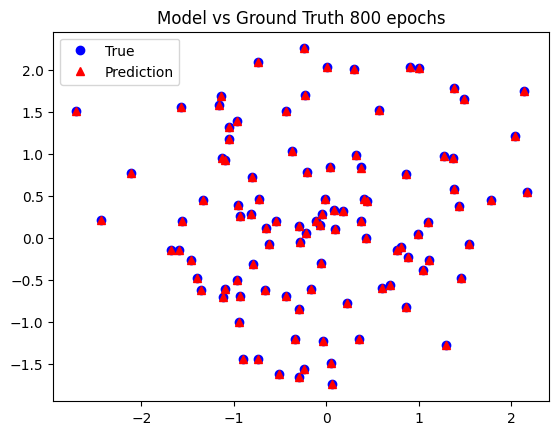

In [ ]:
y_pred = ann(x).data

plt.plot(np.array(x.data).flatten(), np.array(y_true.data).flatten(), 'bo', label='True')
plt.plot(np.array(x.data).flatten(), np.array(y_pred).flatten(), 'r^', label='Prediction')
plt.legend()
plt.title("Model vs Ground Truth 800 epochs")
plt.show()

## Torch Model

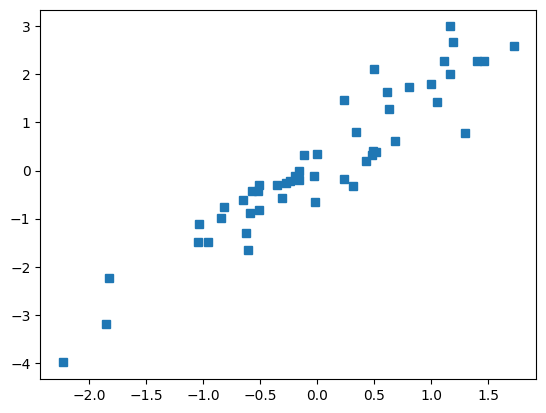

Epoch: 0, loss: 2.0319879055023193
Epoch: 10, loss: 1.5862983465194702
Epoch: 20, loss: 1.1112200021743774
Epoch: 30, loss: 0.8415955305099487
Epoch: 40, loss: 0.7082562446594238
Epoch: 50, loss: 0.6386637091636658
Epoch: 60, loss: 0.5984382629394531
Epoch: 70, loss: 0.5626075863838196
Epoch: 80, loss: 0.5352447628974915
Epoch: 90, loss: 0.5121385455131531
Epoch: 100, loss: 0.49345123767852783
Epoch: 110, loss: 0.47702157497406006
Epoch: 120, loss: 0.45881322026252747
Epoch: 130, loss: 0.4437927305698395
Epoch: 140, loss: 0.43115055561065674
Epoch: 150, loss: 0.4181036055088043
Epoch: 160, loss: 0.40529319643974304
Epoch: 170, loss: 0.39356040954589844
Epoch: 180, loss: 0.38278305530548096
Epoch: 190, loss: 0.3728928864002228
Epoch: 200, loss: 0.36382782459259033
Epoch: 210, loss: 0.355528324842453
Epoch: 220, loss: 0.34793755412101746
Epoch: 230, loss: 0.3410017490386963
Epoch: 240, loss: 0.33466994762420654
Epoch: 250, loss: 0.32889434695243835
Epoch: 260, loss: 0.32363006472587585
E

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

N = 50

x = torch.randn(N, 1)
# y = ax + b = 1.5 * x + b/2
y = 1.5 * x + torch.randn(N, 1)/2

plt.plot(x, y, 's')
plt.show()

ANNreg = nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1)
)

lr = 0.05
lossfn = nn.MSELoss()
optim = torch.optim.SGD(ANNreg.parameters(), lr = lr)
epochs = 500
losses = torch.zeros(epochs)

for epoch in range(epochs):
  # forward pass
  yhat = ANNreg(x)

  # loss
  loss = lossfn(yhat, y)
  losses[epoch] = loss

  # log
  if epoch%10 == 0:
    print(f'Epoch: {epoch}, loss: {loss}')

  # backprop
  optim.zero_grad()
  loss.backward()
  optim.step()

Loss Function

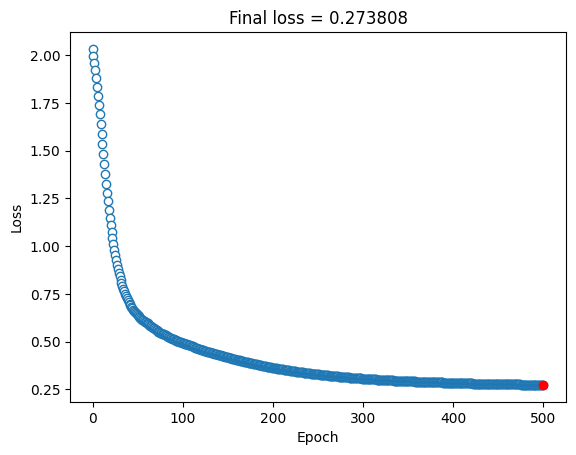

In [ ]:
# final forward pass
predictions = ANNreg(x)

# final loss (MSE)
testloss = (predictions-y).pow(2).mean()
# same, same
testloss2 = lossfn(predictions, y)

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.plot(epochs, testloss.detach(), 'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show( )

In [ ]:
testloss.item(), testloss2.item()

(0.2738078832626343, 0.2738078832626343)

Accuracy

In [ ]:
np.corrcoef(y.T,predictions.detach().T)[0,1]

np.float64(0.9356470123129562)

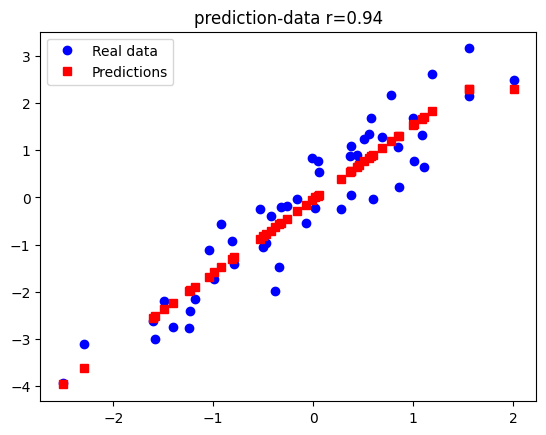

In [ ]:
# plot the data
plt.plot(x, y, 'bo', label = 'Real data')
plt.plot(x, predictions.detach(), 'rs', label = 'Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()

## Model Class

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

class Model:
  def __init__(self, lr, epochs, N, a, b):
    self.ANN = nn.Sequential(nn.Linear(1,1),
                             nn.ReLU(),
                             nn.Linear(1,1))
    self.lr = lr
    self.epochs = epochs
    self.N = N
    self.a = a
    self.b = b
    self.lossfn = nn.MSELoss()
    self.optimizer = torch.optim.SGD(self.ANN.parameters(), lr = lr)


  def generate_data(self):
    x = torch.randn(self.N,1)
    y = self.a * x + self.b * torch.randn(self.N,1)
    return x, y

  def train(self, x, y, verbose=True):
    if verbose: print('=====================\n\nTRAINING LOG\n\n=====================')
    losses = torch.zeros(self.epochs)
    for epoch in range(self.epochs):
      # feed forward
      y_hat = self.ANN(x)

      # loss
      loss = self.lossfn(y_hat, y)
      losses[epoch] = loss

      # log
      if epoch%10==0 and verbose:
        print(f'Epoch: {epoch}, Loss: {loss}')

      # backprop
      self.optimizer.zero_grad()
      loss.backward()
      self.optimizer.step()
    if verbose: print('=====================\n\n=====================')
    predictions = self.ANN(x)

    return predictions, losses

  def plot(self, x, y, predictions, losses):
    test_loss = self.lossfn(y, predictions.detach())

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # --- Subplot 1: Loss plot ---
    axs[0].plot(losses.detach(), "bo", label="Training Loss")
    axs[0].plot(self.epochs, test_loss, 'ro', label="Test Loss")
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].set_title(f'Final Loss: {test_loss.item():.4f}')
    axs[0].legend()

    # --- Subplot 2: Prediction vs True values ---
    axs[1].plot(x, y, 'bo', label='True Values')
    axs[1].plot(x, predictions.detach(), 'rs', label='Predicted Values')
    corr = np.corrcoef(y.T, predictions.detach().T)[0, 1]
    axs[1].set_title(f'True vs Predicted (r = {corr:.2f})')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

    print('=====================\n\n=====================')


TRAINING LOG

Epoch: 0, Loss: 3.093029260635376
Epoch: 10, Loss: 1.5629135370254517
Epoch: 20, Loss: 0.8163506984710693
Epoch: 30, Loss: 0.5723974704742432
Epoch: 40, Loss: 0.49199801683425903
Epoch: 50, Loss: 0.457609623670578
Epoch: 60, Loss: 0.4319409132003784
Epoch: 70, Loss: 0.40403369069099426
Epoch: 80, Loss: 0.37418633699417114
Epoch: 90, Loss: 0.34442436695098877
Epoch: 100, Loss: 0.3219144940376282
Epoch: 110, Loss: 0.3053843379020691
Epoch: 120, Loss: 0.29276952147483826
Epoch: 130, Loss: 0.2803844213485718
Epoch: 140, Loss: 0.2697734534740448
Epoch: 150, Loss: 0.261165976524353
Epoch: 160, Loss: 0.25417467951774597
Epoch: 170, Loss: 0.248219832777977
Epoch: 180, Loss: 0.24317380785942078
Epoch: 190, Loss: 0.23876601457595825
Epoch: 200, Loss: 0.2345069944858551
Epoch: 210, Loss: 0.23053117096424103
Epoch: 220, Loss: 0.22702085971832275
Epoch: 230, Loss: 0.22391821444034576
Epoch: 240, Loss: 0.22117750346660614
Epoch: 250, Loss: 0.2191382795572281
Epoch: 260, Loss: 0.217916

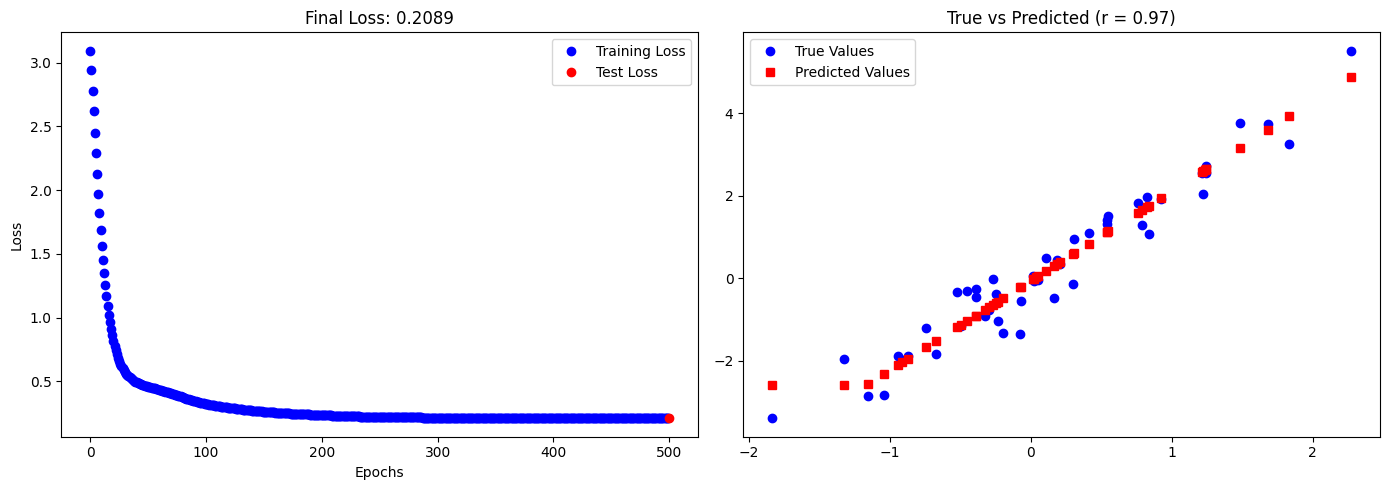

In [ ]:
# Initiate the model
model = Model(lr = 0.05,
              epochs = 500,
              N = 50,
              a = 2.0,
              b = 0.5)
# Generate the data
x, y = model.generate_data()
# Train the model
predictions, losses = model.train(x, y)
# Plot losses and accuracy
model.plot(x, y, predictions, losses)